In [67]:
from web_scraping import *
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
import networkx as nx

In [3]:
df = pickle.load(open("movies_df.p", "rb"))

In [4]:
df[:4]

,movie title,domestic total gross,release date,genre,runtime,rating,budget,director,actors,composer,...,producer,imdb_rating,imdb_votes,tomato_meter,tomato_rating,tomato_rotten,tomato_user_rating,tomato_user_reviews,meta_score,tomato_consensus
0,10,74865517,1979-10-05,"[Comedy, Romance]",121,R,NaN,[Blake Edwards],[Julie Andrews],None,...,None,6.0,NaN,71,6.4,6,2.9,14584,NaN,NaN
1,"10,000 B.C.",94784201,2008-03-07,"[Action, Adventure, Drama]",109,PG-13,105000000,[Roland Emmerich],"[Steven Strait, Camilla Belle]","[Harald Kloser, Thomas Wander]",...,"[Mark Gordon, Harald Kloser (executive), Scott...",5.1,NaN,8,3.2,133,2.9,410840,34,NaN
2,"10,000 Km",12423,2015-07-10,"[Comedy, Drama]",99,R,NaN,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After Earth,60522097,2013-05-31,"[Action, Adventure, Sci-Fi]",100,PG-13,130000000,[M. Night Shyamalan],"[Jaden Smith, Will Smith]",[James Newton Howard],...,"[Jada Pinkett-Smith, M. Night Shyamalan, Will ...",4.9,NaN,11,3.8,168,2.8,121043,33,NaN


In [5]:
actor_interact = []
for i in df.iterrows():
    if i[1]['actors'] != None and i[1]['actors'] != ['N/A']:
        actor_interact.append(i[1]['actors'])
len(actor_interact)

15003

In [6]:
G = nx.Graph()

In [7]:
for cast in actor_interact:
    if cast:
        if len(cast) == 1:
            G.add_edge(cast[0], cast[0])
        elif len(cast) >= 1: 
            for pair in combinations(cast, 2):
                G.add_edge(*pair)

In [8]:
len(G.nodes())

22206

In [42]:
nx.write_gml(G, "G_movies.gml")

2005-2016

In [36]:
actor_interact_2008 =[]
for i in df.iterrows():
    if i[1]['actors'] != None and i[1]['actors'] != ['N/A'] and i[1]['release date'].year >= 2012 and 'Action' in i[1]['genre']:
        actor_interact_2008.append(i[1]['actors'])
len(actor_interact_2008)

469

In [37]:
G_2008 = nx.Graph()

for cast in actor_interact_2008:
    if cast:
        if len(cast) == 1:
            G_2008.add_edge(cast[0], cast[0])
        elif len(cast) >= 1: 
            for pair in combinations(cast, 2):
                G_2008.add_edge(*pair)

In [38]:
len(G_2008.nodes())

1322

In [39]:
pos = nx.random_layout(G_2008)

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


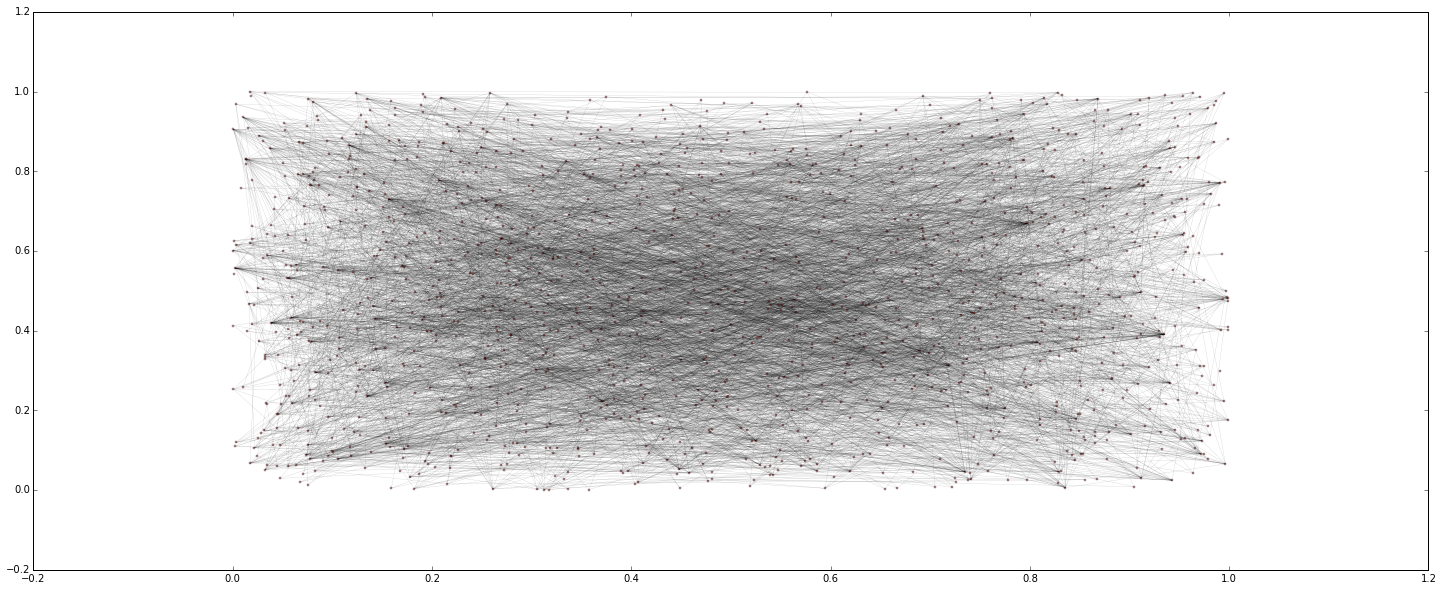

In [40]:
plt.figure(figsize =(25,10))
nx.draw_networkx_edges(G_2008, pos, width=0.2, alpha=0.3)
nx.draw_networkx_nodes(G_2008, pos, node_size=3 , alpha=0.4)

In [41]:
nx.write_gml(G_2008, "G_2014.gml")

** Back to G **

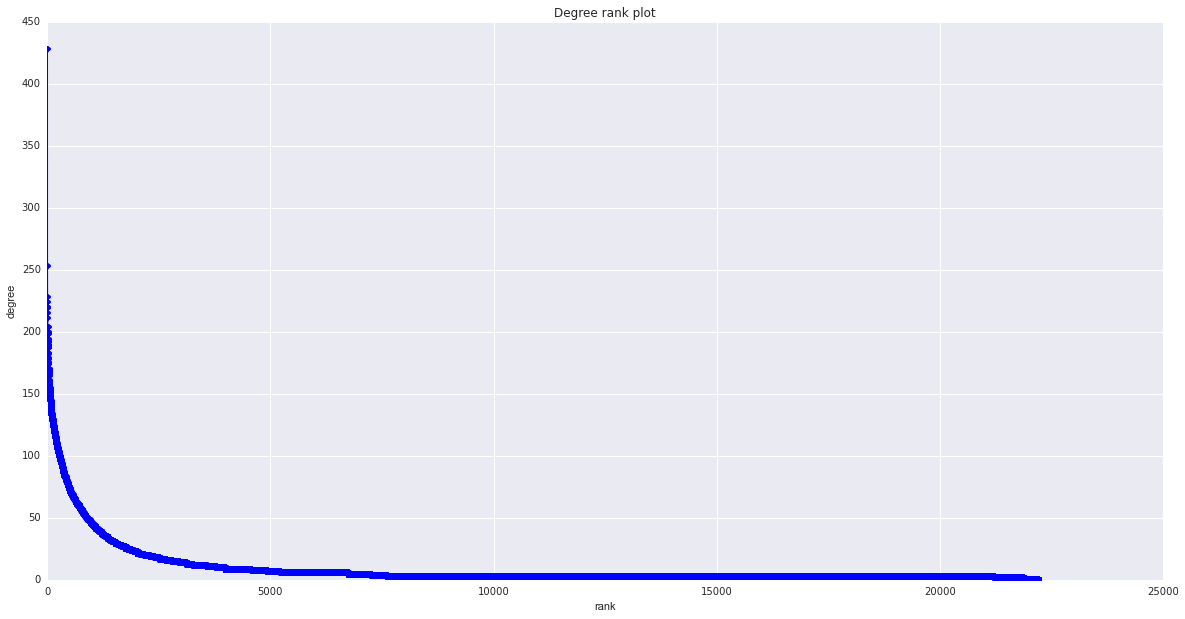

In [53]:
plt.figure(figsize = (20,10))
degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.plot(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

In [61]:
G.remove_node('')

In [72]:
dict_degree = nx.degree(G)
dict_degree["Nfezk"]

KeyError: 'Nfezk'

In [90]:
df['degree_centrality'] = pd.Series(None, index=df.index)

In [106]:
def sum_degrees(cast, dict_degree):
    somme = 0
    if cast:
        for name in cast:
            try:
                somme += dict_degree[name]
            except Exception:
                somme += 0
            
    return somme

In [113]:
for row in df.iterrows():
    df.set_value(row[0], 'degree_centrality', sum_degrees(row[1]['actors'], dict_degree))

In [116]:
pickle.dump(df,open("movies_df.p", "wb"))

** Betweenness centrality **

In [120]:
b_centrality = nx.betweenness_centrality(G)

In [124]:
b_centrality["Robert Downey"]

0.003076775748613944

In [134]:
df['betweenness_centrality'] = pd.Series(None, index=df.index)

In [135]:
def sum_between(cast, dict_between):
    somme = 0
    if cast:
        for name in cast:
            try:
                somme += dict_between[name]
            except Exception:
                somme += 0
            
    return somme

In [136]:
for row in df.iterrows():
    df.set_value(row[0], 'betweenness_centrality', sum_between(row[1]['actors'], b_centrality))

In [137]:
pickle.dump(df,open("movies_df.p", "wb"))

** Closeness centrality **

In [131]:
c_centrality = nx.closeness_centrality(G)

In [132]:
c_centrality

{'Kiko Ellsworth': 0.1162038623248179,
 'Ry Cooder': 0.00027022158169699153,
 'Till Fellner': 0.00013511079084849577,
 "Tatum O'Neal": 0.13267042021816752,
 'Ashraf Barhom': 0.11185011426702879,
 'Rob Bruner': 0.00013511079084849577,
 'Anna Lee': 0.15289577076823324,
 'Paul Blackthorne': 0.09328879906695124,
 'Ni Yan': 0.09355429111215104,
 'Ernie Lee Banks': 0.00013511079084849577,
 'David Ambit': 0.00013511079084849577,
 'Adam Pascal': 0.13153116267393555,
 'Peggy Knudsen': 0.13535769798737815,
 'Reiley McClendon': 0.13560251438545146,
 'Elaine Fligman': 0.00013511079084849577,
 'Josh Hopkins': 0.13065251890481222,
 'Bud Cort': 0.15496095586545444,
 'Spalding Gray': 0.12270161622974009,
 'Marge Baker': 0.0001801477211313277,
 'Kari Wuhrer': 0.11555344998668315,
 'Alexandre Mérineau': 0.1165349996825192,
 'Susie Porter': 0.13603199824473597,
 'Gary Conway': 0.10865094364348828,
 'Pradeep Singh Rawat': 0.00013511079084849577,
 'Uygar Aktan': 0.00013511079084849577,
 'Simon Schwarz': 0.

In [138]:
df['closeness_centrality'] = pd.Series(None, index=df.index)

In [139]:
def sum_close(cast, dict_close):
    somme = 0
    if cast:
        for name in cast:
            try:
                somme += dict_close[name]
            except Exception:
                somme += 0
            
    return somme

In [140]:
for row in df.iterrows():
    df.set_value(row[0], 'closeness_centrality', sum_close(row[1]['actors'], c_centrality))

In [142]:
pickle.dump(df,open("movies_df.p", "wb"))

** Dumping useless rows df **

In [197]:
df1 = df[df["domestic total gross"] > 0]
df2 = df1[df1.degree_centrality + df1.closeness_centrality + df1.betweenness_centrality > 0]

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


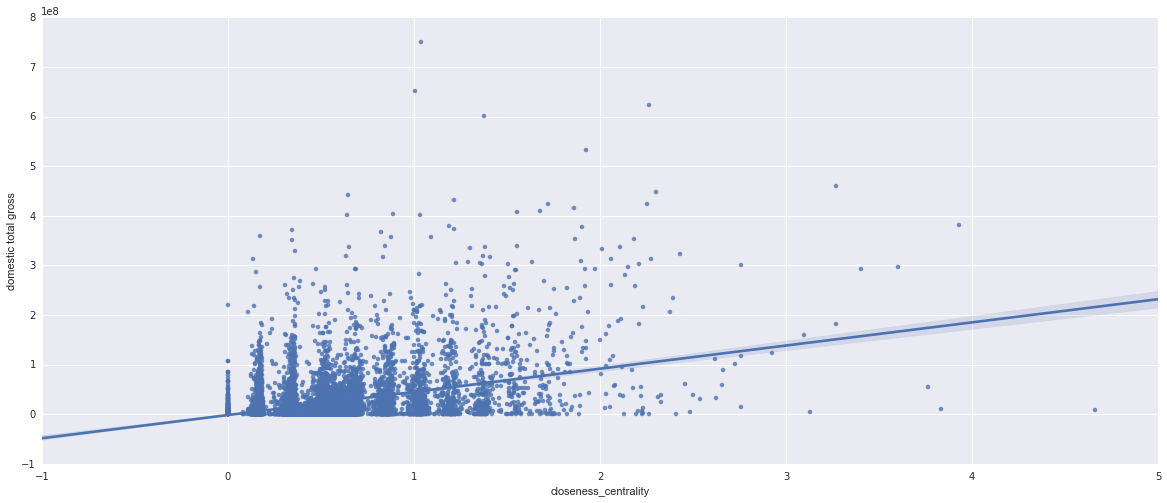

In [198]:
plt.figure(figsize=(20,8))
sns.regplot(x = "closeness_centrality", y = "domestic total gross", data = df2)

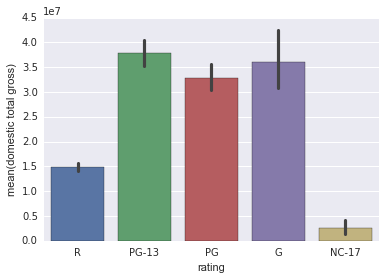

In [199]:
sns.barplot(x = 'rating', y = 'domestic total gross', data = df2)

In [200]:
df2

,movie title,domestic total gross,release date,genre,runtime,rating,budget,director,actors,composer,...,tomato_rating,tomato_rotten,tomato_user_rating,tomato_user_reviews,meta_score,tomato_consensus,degree_centrality,betweenness_centrality,closeness_centrality,mean_ratings
0,10,74865517,1979-10-05,"[Comedy, Romance]",121,R,NaN,[Blake Edwards],[Julie Andrews],None,...,6.4,6,2.9,14584,NaN,NaN,52,8.210981e-04,0.161704,NaN
1,"10,000 B.C.",94784201,2008-03-07,"[Action, Adventure, Drama]",109,PG-13,105000000,[Roland Emmerich],"[Steven Strait, Camilla Belle]","[Harald Kloser, Thomas Wander]",...,3.2,133,2.9,410840,34,NaN,31,1.217733e-04,0.300441,NaN
3,After Earth,60522097,2013-05-31,"[Action, Adventure, Sci-Fi]",100,PG-13,130000000,[M. Night Shyamalan],"[Jaden Smith, Will Smith]",[James Newton Howard],...,3.8,168,2.8,121043,33,NaN,88,2.826778e-04,0.324039,NaN
4,"1,000 Times Good Night",53895,2014-10-24,[Drama],117,None,NaN,[Erik Poppe],"[Juliette Binoche, Nikolaj Coster-Waldau]",None,...,6.0,14,3.6,1799,57,NaN,96,2.414411e-03,0.327649,NaN
5,1001 Grams,10983,2015-05-08,[Drama],93,None,NaN,[Bent Hamer],"[Ane Dahl Torp, Laurent Stocker, Hildegun Riis...",None,...,6.9,3,3.3,214,65,NaN,18,5.027998e-04,0.451734,NaN
8,The Hundred-Foot Journey,54240821,2014-08-08,"[Comedy, Drama]",122,PG,22000000,[Lasse Hallstrom],"[Helen Mirren, Charlotte Le, Bon]",[A.R. Rahman],...,6.2,41,4.0,31812,55,NaN,131,7.321678e-04,0.469511,NaN
9,The 100-Year Old Man Who Climbed Out the Windo...,944193,2015-05-01,"[Adventure, Comedy]",114,R,NaN,[Felix Herngren],"[Robert Gustafsson, Iwar Wiklander, David Wibe...",None,...,5.9,23,3.6,4303,58,NaN,12,0.000000e+00,0.000540,NaN
10,101 Dalmatians,18000000,1969-01-01,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,NaN
11,101 Dalmatians,19000000,1979-01-01,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,NaN
12,101 Dalmatians,33049729,1985-12-20,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,NaN


In [201]:
from collections import defaultdict
actors = {}

In [202]:
import numpy as np

In [203]:
for row in df2.iterrows():
    if row[1]['actors']:
        for actor in row[1]['actors']:
            mean_rating = []
            if row[1]['imdb_rating']:
                mean_rating.append(row[1]['imdb_rating']/10)
            if row[1]['meta_score']:
                mean_rating.append(row[1]['meta_score']/100)
            if row[1]['tomato_rating']:
                mean_rating.append(row[1]['tomato_rating']/10)
        if actor not in actors:
            actors[actor]=[]
        if mean_rating:
            actors[actor].append(np.nanmean(mean_rating))

//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-pack

In [204]:
for k, v in actors.items():
    actors[k] = np.nanmean(v)

//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-pack

In [205]:
df2['mean_ratings'] = pd.Series(None, index=df.index)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [208]:
def mean_rat(cast, actors):
    liste = []
    if cast:
        for name in cast:
            try:
                liste.append(actors[name])
            except Exception:
                pass
            
    return np.nanmean(liste)

In [209]:
for row in df2.iterrows():
    df2.set_value(row[0], 'mean_ratings', mean_rat(row[1]['actors'], actors))

//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
//anaconda/lib/python3.5/site-pack

In [210]:
df2

,movie title,domestic total gross,release date,genre,runtime,rating,budget,director,actors,composer,...,tomato_rating,tomato_rotten,tomato_user_rating,tomato_user_reviews,meta_score,tomato_consensus,degree_centrality,betweenness_centrality,closeness_centrality,mean_ratings
0,10,74865517,1979-10-05,"[Comedy, Romance]",121,R,NaN,[Blake Edwards],[Julie Andrews],None,...,6.4,6,2.9,14584,NaN,NaN,52,8.210981e-04,0.161704,0.639167
1,"10,000 B.C.",94784201,2008-03-07,"[Action, Adventure, Drama]",109,PG-13,105000000,[Roland Emmerich],"[Steven Strait, Camilla Belle]","[Harald Kloser, Thomas Wander]",...,3.2,133,2.9,410840,34,NaN,31,1.217733e-04,0.300441,0.390000
3,After Earth,60522097,2013-05-31,"[Action, Adventure, Sci-Fi]",100,PG-13,130000000,[M. Night Shyamalan],"[Jaden Smith, Will Smith]",[James Newton Howard],...,3.8,168,2.8,121043,33,NaN,88,2.826778e-04,0.324039,0.623056
4,"1,000 Times Good Night",53895,2014-10-24,[Drama],117,None,NaN,[Erik Poppe],"[Juliette Binoche, Nikolaj Coster-Waldau]",None,...,6.0,14,3.6,1799,57,NaN,96,2.414411e-03,0.327649,0.625833
5,1001 Grams,10983,2015-05-08,[Drama],93,None,NaN,[Bent Hamer],"[Ane Dahl Torp, Laurent Stocker, Hildegun Riis...",None,...,6.9,3,3.3,214,65,NaN,18,5.027998e-04,0.451734,0.595000
8,The Hundred-Foot Journey,54240821,2014-08-08,"[Comedy, Drama]",122,PG,22000000,[Lasse Hallstrom],"[Helen Mirren, Charlotte Le, Bon]",[A.R. Rahman],...,6.2,41,4.0,31812,55,NaN,131,7.321678e-04,0.469511,0.613222
9,The 100-Year Old Man Who Climbed Out the Windo...,944193,2015-05-01,"[Adventure, Comedy]",114,R,NaN,[Felix Herngren],"[Robert Gustafsson, Iwar Wiklander, David Wibe...",None,...,5.9,23,3.6,4303,58,NaN,12,0.000000e+00,0.000540,0.626667
10,101 Dalmatians,18000000,1969-01-01,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,0.765000
11,101 Dalmatians,19000000,1979-01-01,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,0.765000
12,101 Dalmatians,33049729,1985-12-20,"[Animation, Adventure, Comedy]",79,G,NaN,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...","[Rod Taylor, J. Pat O'Malley, Betty Lou Gerson...",None,...,8.1,1,3.3,707846,NaN,NaN,51,5.078567e-04,0.529742,0.765000


In [212]:
pickle.dump(df2,open("movies_df.p", "wb"))